In [1]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray
 
 
# load the image and convert into
# numpy array
img = Image.open(r"C:\Users\Tomas\Desktop\Martin Group\Presentations\Presentation Pictures\damping_temp.png")
 
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(672, 681, 4)


In [2]:
gray = img.convert('L')
bw = gray.point(lambda x: 0 if x<128 else 255, '1')
bw.save("result_bw.png")

In [3]:
import numpy as np
np.unique(numpydata)

array([  0,  11,  12,  16,  17,  19,  21,  24,  25,  30,  31,  32,  33,
        35,  36,  37,  38,  40,  41,  43,  44,  45,  46,  47,  49,  50,
        51,  52,  53,  54,  55,  57,  58,  60,  61,  62,  63,  64,  65,
        67,  68,  69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  84,  85,  86,  87,  88,  89,  90,  93,  94,  95,  96,
        97,  98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125,
       126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 219, 22

In [4]:
numpydata

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

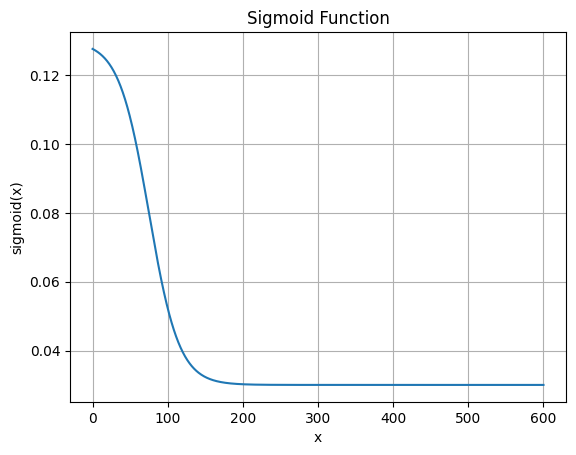

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function definition
def sigmoid_approx(x):
    return .13-.1 / (1 + np.exp(-(x-75)/20))

# Generate a range of values from -10 to 10 for x
x = np.linspace(0, 600, 1000)

# Apply the sigmoid function to these values
y = sigmoid_approx(x)

# Plotting
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()


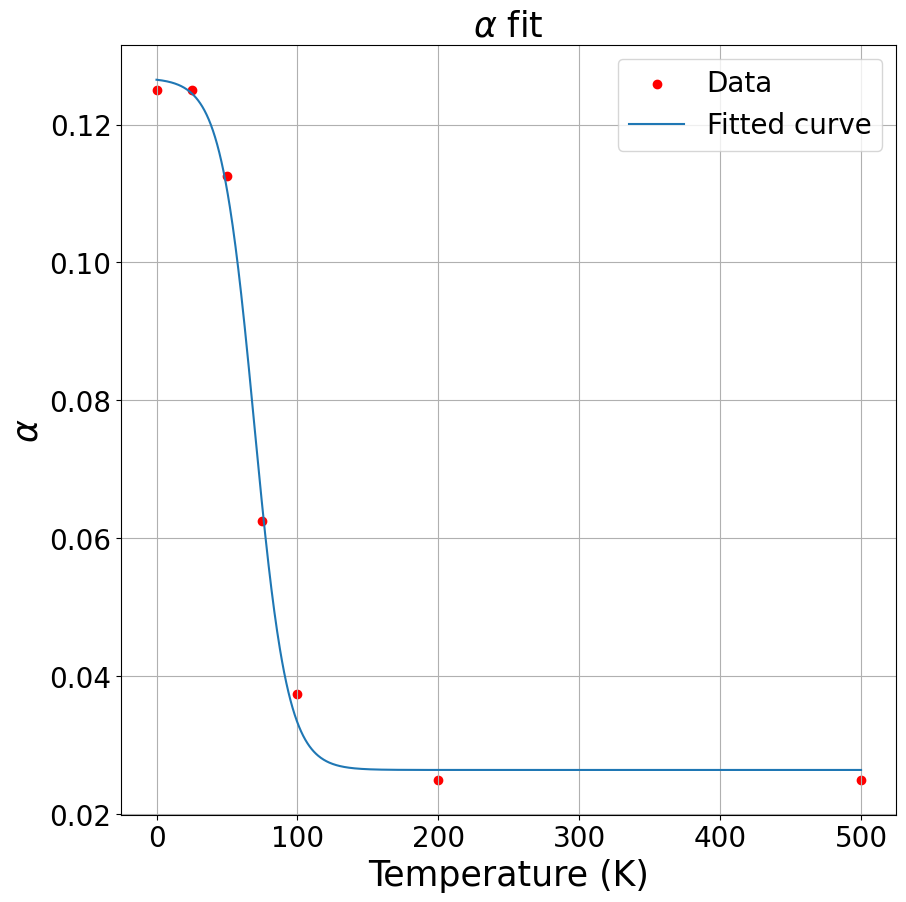

In [7]:
from scipy.optimize import curve_fit

# Define the sigmoid function
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return y

# data points
x_data = np.array([0, 25, 50, 75, 100, 200, 500]) # temperature, K
y_data = np.array([.125, .125, .1125, .0625, .0375, .025, .025]) # damping

# Use curve_fit to fit the sigmoid function to the data
popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=np.array([-.1,75,1/20,.13]),method='dogbox') #bounds=(0, 500), maxfev=1000)

# Generate x values for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = sigmoid(x_fit, *popt)

# Plotting
plt.figure(figsize=(10,10))
plt.scatter(x_data, y_data, label='Data', color='red') # original data
plt.plot(x_fit, y_fit, label='Fitted curve') # fitted sigmoid curve
plt.legend(fontsize=20)
plt.title(r'$\alpha$ fit',size=25)
plt.xlabel('Temperature (K)',size=25)
plt.ylabel(r'$\alpha$',size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()


In [8]:
M0 = 5.2e5          # Ms at 0K (A/m)
Tc = 631            # K, Curie temperature
Temp = 0.1               # Temperature in K
t = Temp/Tc              # fractional temperature

In [9]:
import scipy as sp
# function to determine magnetization saturation
def fn1(m):
    return m - np.tanh(m/t)

In [10]:
M = []
for i in range(1,Tc+1):
    m = sp.optimize.brentq(fn1,0.001,2) # fractional mag sat 
    Ms=M0*m                          # saturation at given temperature
    M.append(Ms)
    Temp+=1
    t=Temp/Tc

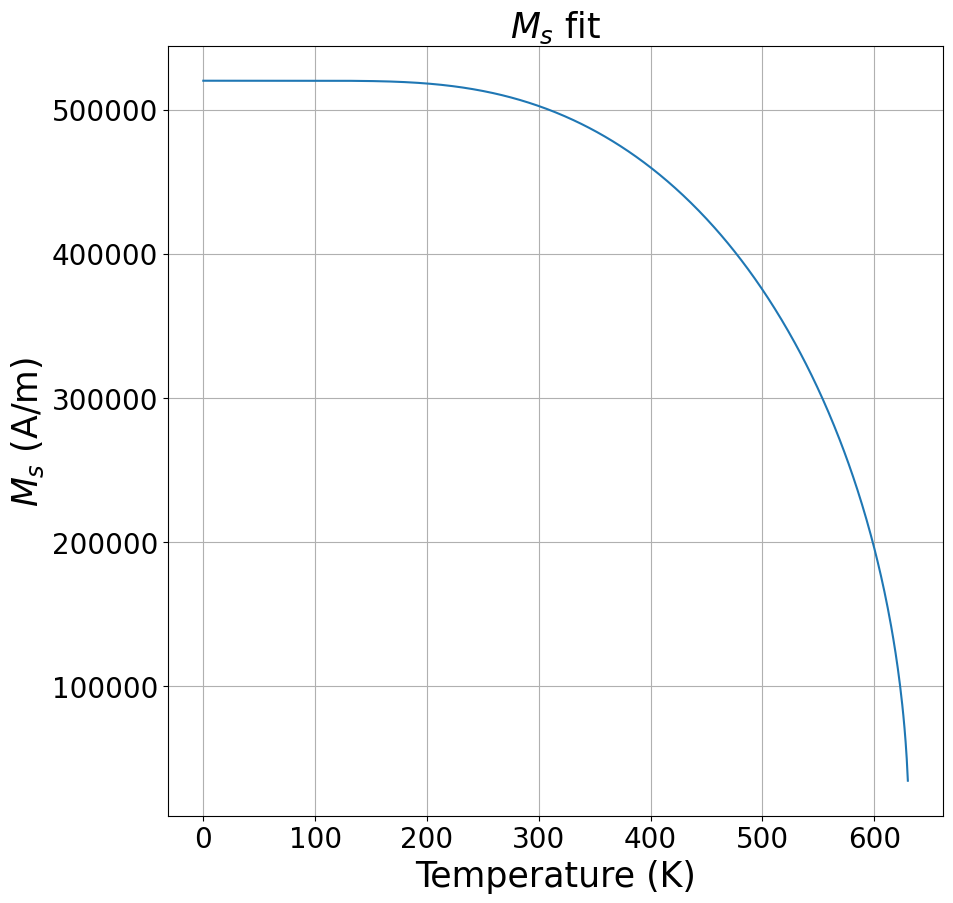

In [12]:
plt.figure(figsize=(10,10))
plt.plot(M)
plt.title(r'$M_s$ fit',size=25)
plt.ylabel(r'$M_s$ (A/m)',size=25)
plt.xlabel('Temperature (K)',size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()